In [1]:
import pandas as pd
import numpy as np
import missingno as msn

import matplotlib.pyplot as plt

# Carga de datos

## Train

### Archivo products.csv

In [2]:
products = pd.read_csv("../data/products.csv")

print(f"Dimension: {products.shape}")
print(f"Cabecera {list(products.columns)}")

Dimension: (15238, 4)
Cabecera ['product_id', 'family_id', 'subfamily_id', 'price']


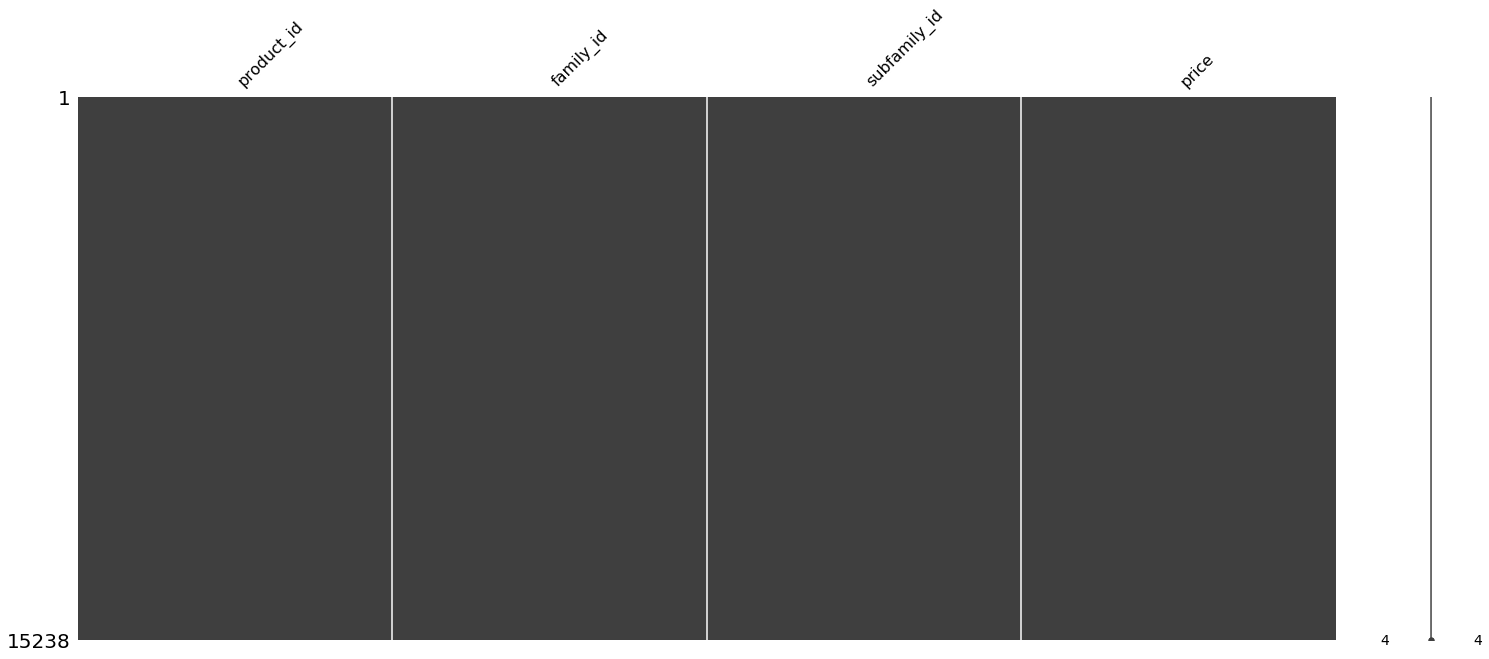

In [3]:
# Comprobamos si hay nulos en el dataset 
msn.matrix(products)

In [4]:
# products.describe()

### Archivo stock_and_sales_day_0_day_63.csv

In [5]:
products_stock_ventas = pd.read_csv("../data/stock_and_sales_day_0_day_63.csv")

print(f"Dimension: {products_stock_ventas.shape}")
print(f"Cabecera {list(products_stock_ventas.columns)}")

Dimension: (2421061, 6)
Cabecera ['date_number', 'product_id', 'color_id', 'size_id', 'sales', 'stock']


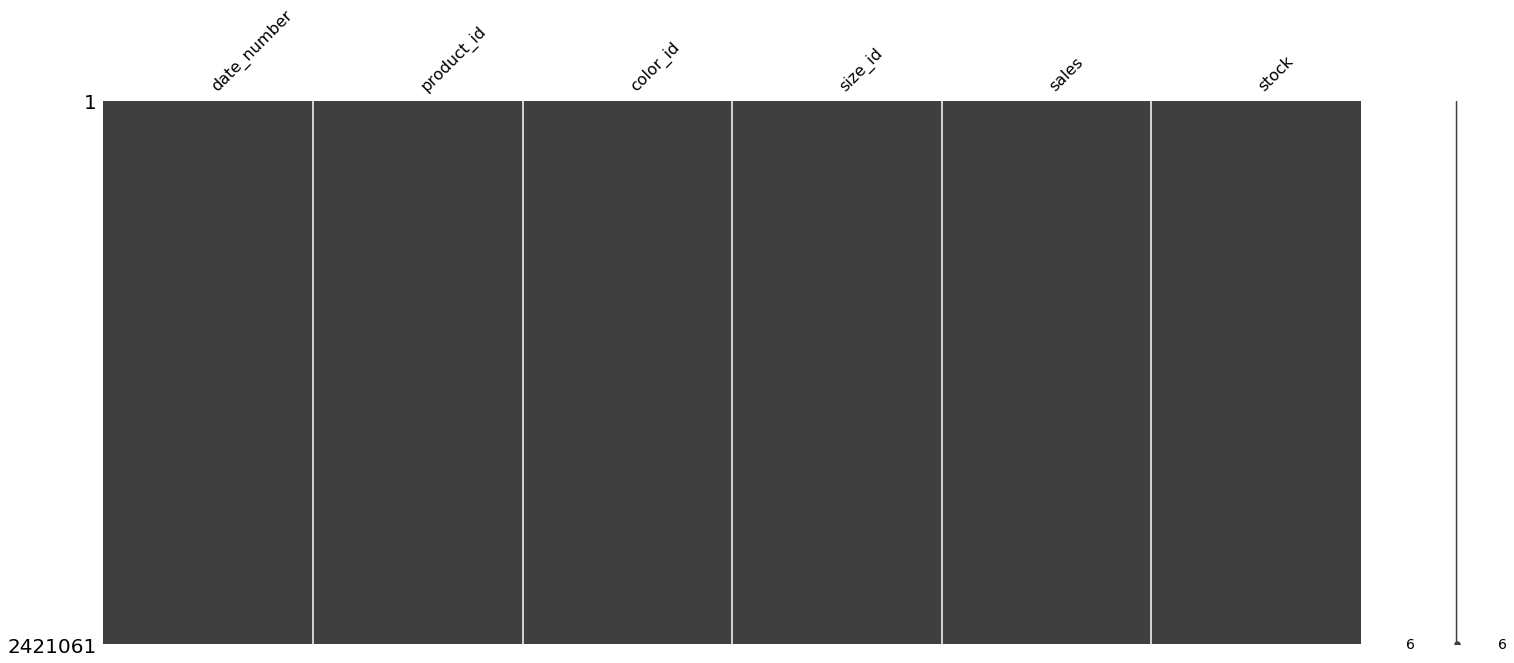

In [6]:
# Comprobamos si hay nulos en el dataset 
msn.matrix(products_stock_ventas)

In [7]:
# products_stock_ventas.head()

### Archivo product_blocks.csv

In [8]:
products_blocks = pd.read_csv("../data/product_blocks.csv")

print(f"Dimension: {products_blocks.shape}")
print(f"Cabecera {list(products_blocks.columns)}")

Dimension: (15238, 2)
Cabecera ['product_id', 'block_id']


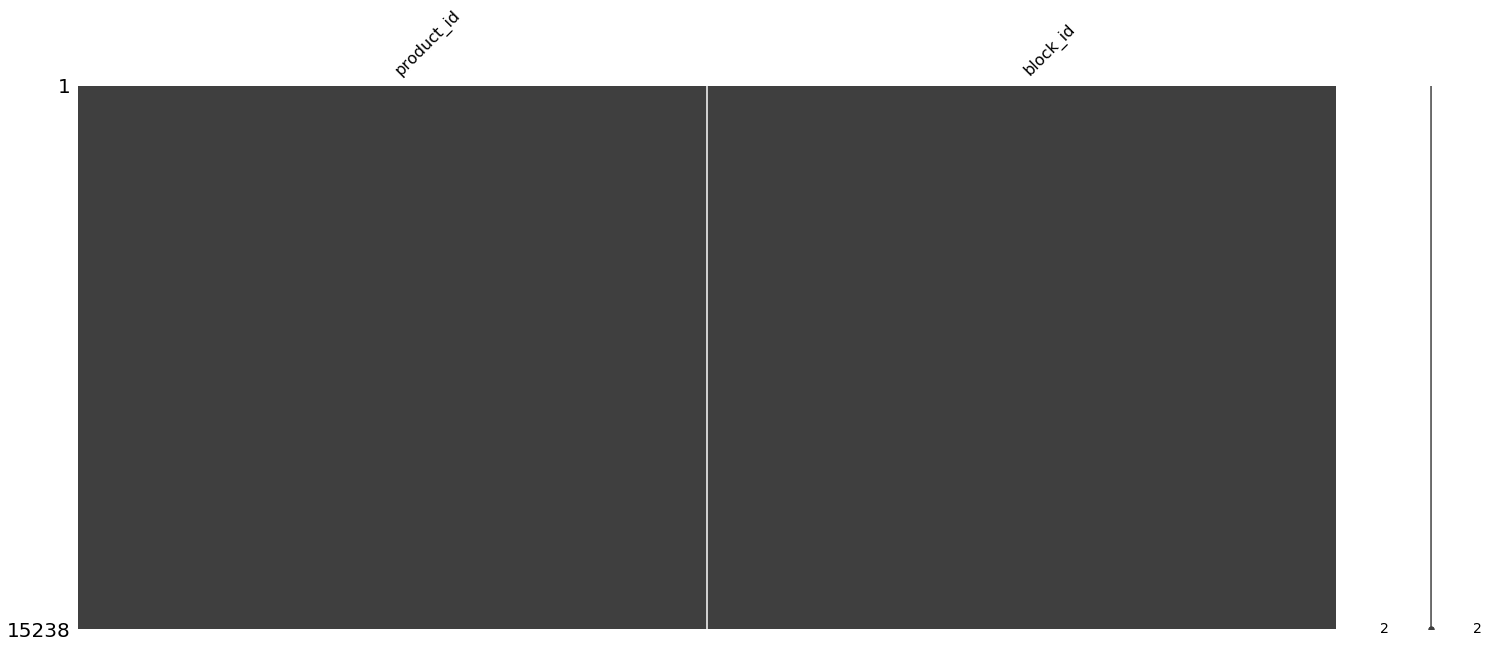

In [9]:
# Comprobamos si hay nulos en el dataset 
msn.matrix(products_blocks)

In [10]:
# products_blocks.head()

### Archivo positions_day_0_day_63.csv

In [11]:
product_positions_0_63 = pd.read_csv("../data/positions_day_0_day_63.csv")

print(f"Dimension: {product_positions_0_63.shape}")
print(f"Cabecera {list(product_positions_0_63.columns)}")

Dimension: (969897, 4)
Cabecera ['date_number', 'product_id', 'category_id', 'position']


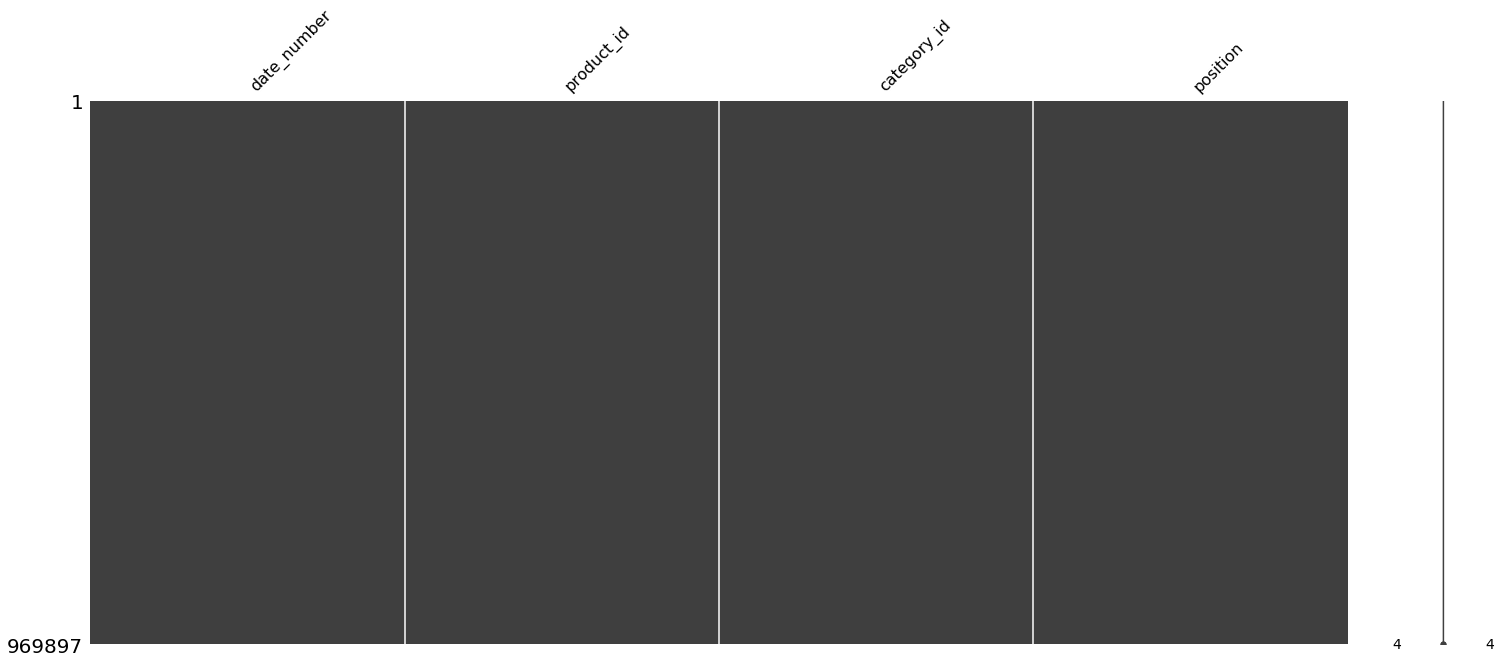

In [12]:
# Comprobamos si hay nulos en el dataset 
msn.matrix(product_positions_0_63)

In [13]:
# product_positions_0_63.head()

## Test

In [14]:
product_stock_70= pd.read_csv("../data/stock_day_71_stock_replenishment_days_72-77.csv")


In [15]:
product_positions_71 = pd.read_csv("../data/positions_day_71.csv")

# Dimensiones

In [16]:
products.shape

(15238, 4)

In [17]:
products_blocks.shape

(15238, 2)

In [18]:
products_stock_ventas.shape

(2421061, 6)

In [19]:
product_positions_0_63.shape

(969897, 4)

# Caracteristicas posiciones

 El Dataset de stock tiene mas productos que el de posiciones. Además, un producto puede estar en mas de una categoría, asique el join hará que DF se expanda.

Además, en el test no hay mucha información de posiciones

Por ahora, no se va a unir al train inicial, si no que se sacaran caracteristicas de este dataset.

In [20]:
mc = product_positions_0_63.groupby(['product_id','date_number']).count()

Hay mas de 2/3 de los productos que pertenecen a mas de una categoría simultáneamente

In [21]:
mc[mc.category_id >1].shape

(275784, 2)

In [22]:
mc[mc.category_id ==1].shape

(109672, 2)

# Dataframe Train

Join directo

In [23]:
train = pd.merge(products,products_blocks,how='inner',on='product_id')

In [24]:
train.shape

(15238, 5)

Join con ventas

In [25]:
train = pd.merge(train,products_stock_ventas,how='inner',on='product_id')

In [26]:
train.shape

(2421061, 10)

# Export train

In [27]:
train.to_csv("train.csv",header=True,index=True,index_label='index')

In [28]:
!head train.csv

index,product_id,family_id,subfamily_id,price,block_id,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,1969,59,909958217,111455099,0,17
1,151926,396066037,335531561,25.95,1969,59,909958217,242364222,3,63
2,151926,396066037,335531561,25.95,1969,59,909958217,513017386,1,33
3,151926,396066037,335531561,25.95,1969,59,909958217,820445075,1,42
4,151926,396066037,335531561,25.95,1969,60,909958217,54666687,2,72
5,151926,396066037,335531561,25.95,1969,60,909958217,111455099,2,21
6,151926,396066037,335531561,25.95,1969,60,909958217,242364222,2,95
7,151926,396066037,335531561,25.95,1969,60,909958217,513017386,1,46
8,151926,396066037,335531561,25.95,1969,60,909958217,820445075,3,96


## Ejemplo Producto 151926

Un producto, tiene varias caracteristicas. 

Ej: Una camiseta A, puede tener 2 tallas y 2 colores. La id del producto A aparece 4 veces, debido a que cada producto en cada caracteristica tiene unas ventas diferentes


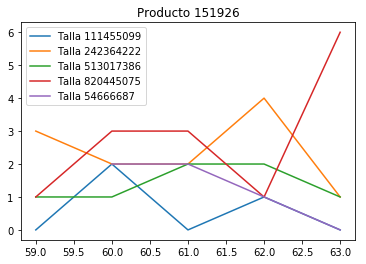

In [29]:
df = train[(train.product_id == 151926)]
for i in df.size_id.unique():
    x = train[(train.product_id == 151926) & (train.size_id == i)]
    plt.plot(x.date_number,x.sales, label=f'Talla {i}')
    #plt.plot(x.date_number,x.stock)

plt.title('Producto 151926')    
plt.legend()

# Problema para hacer join

In [30]:
product_positions_0_63.loc[(
    product_positions_0_63.product_id == 151926) & (product_positions_0_63.date_number == 59)]

,date_number,product_id,category_id,position
879996,59,151926,76153878,62
885071,59,151926,447647762,9
889023,59,151926,627301934,62
889667,59,151926,653552053,10


In [31]:
train.loc[(train.product_id==151926) & (train.date_number==59) ]

,product_id,family_id,subfamily_id,price,block_id,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,1969,59,909958217,111455099,0,17
1,151926,396066037,335531561,25.95,1969,59,909958217,242364222,3,63
2,151926,396066037,335531561,25.95,1969,59,909958217,513017386,1,33
3,151926,396066037,335531561,25.95,1969,59,909958217,820445075,1,42


In [32]:
aux1 = product_positions_0_63.loc[(
    product_positions_0_63.product_id == 151926) & (product_positions_0_63.date_number == 59)]

aux2 = train.loc[(train.product_id==151926) & (train.date_number==59) ]

pd.merge(aux1,aux2,on=['product_id','date_number'],how='inner')

,date_number,product_id,category_id,position,family_id,subfamily_id,price,block_id,color_id,size_id,sales,stock
0,59,151926,76153878,62,396066037,335531561,25.95,1969,909958217,111455099,0,17
1,59,151926,76153878,62,396066037,335531561,25.95,1969,909958217,242364222,3,63
2,59,151926,76153878,62,396066037,335531561,25.95,1969,909958217,513017386,1,33
3,59,151926,76153878,62,396066037,335531561,25.95,1969,909958217,820445075,1,42
4,59,151926,447647762,9,396066037,335531561,25.95,1969,909958217,111455099,0,17
5,59,151926,447647762,9,396066037,335531561,25.95,1969,909958217,242364222,3,63
6,59,151926,447647762,9,396066037,335531561,25.95,1969,909958217,513017386,1,33
7,59,151926,447647762,9,396066037,335531561,25.95,1969,909958217,820445075,1,42
8,59,151926,627301934,62,396066037,335531561,25.95,1969,909958217,111455099,0,17
9,59,151926,627301934,62,396066037,335531561,25.95,1969,909958217,242364222,3,63
